# Librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Datos generados artificialmente

In [2]:
m = 200

In [3]:
X = 2.5 * np.random.rand(m, 1)

In [4]:
y = 2 + 3*np.random.randn(m, 1) + 8*X**3

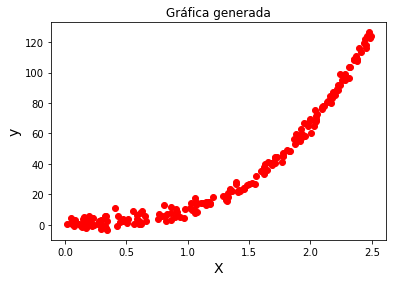

In [5]:
plt.plot(X, y, 'ro', linewidth = 4)
plt.xlabel('X', fontsize = 14)
plt.ylabel('y', fontsize = 14)
plt.title('Gráfica generada')
plt.show()

# Polynomial Regression

## Selección de datos de entrenamiento y prueba

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.2, random_state=60)

### Aproximación por segundo grado

In [8]:
X_new = np.c_[np.ones((len(X_train), 1)), X_train, X_train**2]
X_new

array([[1.00000000e+00, 2.48526388e+00, 6.17653654e+00],
       [1.00000000e+00, 2.27419717e+00, 5.17197276e+00],
       [1.00000000e+00, 2.09921248e+00, 4.40669303e+00],
       [1.00000000e+00, 1.42841340e+00, 2.04036483e+00],
       [1.00000000e+00, 3.27114144e-01, 1.07003663e-01],
       [1.00000000e+00, 1.06757836e+00, 1.13972356e+00],
       [1.00000000e+00, 1.05667577e+00, 1.11656367e+00],
       [1.00000000e+00, 9.76011587e-01, 9.52598618e-01],
       [1.00000000e+00, 2.68727086e-01, 7.22142469e-02],
       [1.00000000e+00, 1.34809471e+00, 1.81735936e+00],
       [1.00000000e+00, 1.88749671e+00, 3.56264383e+00],
       [1.00000000e+00, 2.14462760e+00, 4.59942752e+00],
       [1.00000000e+00, 8.03459893e-01, 6.45547800e-01],
       [1.00000000e+00, 1.30922525e+00, 1.71407076e+00],
       [1.00000000e+00, 1.40759012e+00, 1.98130994e+00],
       [1.00000000e+00, 1.64244921e+00, 2.69763942e+00],
       [1.00000000e+00, 2.31269572e+00, 5.34856149e+00],
       [1.00000000e+00, 2.21409

In [9]:
theta = np.linalg.inv(X_new.T @ X_new) @ (X_new.T @ y_train)
theta

array([[  8.40810042],
       [-31.58181276],
       [ 30.78843981]])

In [10]:
poly_function = theta[0] + theta[1]*X_test + theta[2]*X_test**2

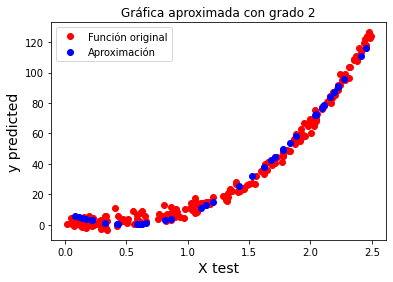

In [11]:
plt.plot(X, y, 'ro', label = 'Función original', linewidth = 4)
plt.plot(X_test, poly_function, 'bo', label = 'Aproximación', linewidth = 2)
plt.xlabel('X test', fontsize = 14)
plt.ylabel('y predicted', fontsize = 14)
plt.title('Gráfica aproximada con grado 2')
plt.legend(loc = 'upper left')
plt.show()

### Verificación por medio de R2 Sklearn

In [12]:
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
r2 = r2_score(y_test,poly_function)
r2

0.9906701202755991

## Aproximación por tercer grado

In [13]:
X_new = np.c_[np.ones((len(X_train), 1)), X_train, X_train**2, X_train**3]
X_new

array([[1.00000000e+00, 2.48526388e+00, 6.17653654e+00, 1.53503231e+01],
       [1.00000000e+00, 2.27419717e+00, 5.17197276e+00, 1.17620858e+01],
       [1.00000000e+00, 2.09921248e+00, 4.40669303e+00, 9.25058500e+00],
       [1.00000000e+00, 1.42841340e+00, 2.04036483e+00, 2.91448445e+00],
       [1.00000000e+00, 3.27114144e-01, 1.07003663e-01, 3.50024116e-02],
       [1.00000000e+00, 1.06757836e+00, 1.13972356e+00, 1.21674421e+00],
       [1.00000000e+00, 1.05667577e+00, 1.11656367e+00, 1.17984578e+00],
       [1.00000000e+00, 9.76011587e-01, 9.52598618e-01, 9.29747289e-01],
       [1.00000000e+00, 2.68727086e-01, 7.22142469e-02, 1.94059242e-02],
       [1.00000000e+00, 1.34809471e+00, 1.81735936e+00, 2.44997254e+00],
       [1.00000000e+00, 1.88749671e+00, 3.56264383e+00, 6.72447851e+00],
       [1.00000000e+00, 2.14462760e+00, 4.59942752e+00, 9.86405919e+00],
       [1.00000000e+00, 8.03459893e-01, 6.45547800e-01, 5.18671766e-01],
       [1.00000000e+00, 1.30922525e+00, 1.71407076e

In [14]:
theta = np.linalg.inv(X_new.T @ X_new) @ (X_new.T @ y_train)
theta

array([[ 1.3614893 ],
       [ 2.43531625],
       [-2.52188149],
       [ 8.71755276]])

In [15]:
poly_function = theta[0] + theta[1]*X_test + theta[2]*X_test**2 + theta[3]*X_test**3

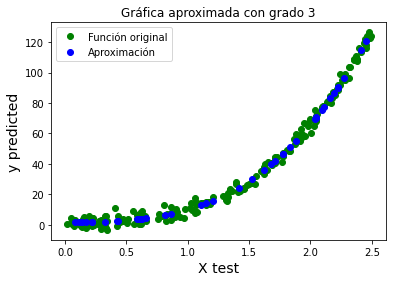

In [16]:
plt.plot(X, y, 'go', label = 'Función original', linewidth = 4)
plt.plot(X_test, poly_function, 'bo', label = 'Aproximación', linewidth = 2)
plt.xlabel('X test', fontsize = 14)
plt.ylabel('y predicted', fontsize = 14)
plt.title('Gráfica aproximada con grado 3')
plt.legend(loc = 'upper left')
plt.show()

### Verificación por medio de R2 Sklearn

In [17]:
r2 = r2_score(y_test,poly_function)
r2

0.995269982807832